# Tutorial: Energy Densities of the Photon Targets

agnpy estimates the energy densities, $u\,/\,({\rm erg}\,{\rm cm}^{-3})$, of line and thermal emitters as a function of the distance from the central black hole (BH) along the jet axis, $u(r)$, in the reference frames comoving with the galaxy or the blob. This distance represents the distance of the blob (and of the accelerated particles) from the photon fields produced by the line and thermal emitters. When considering the external Compton scenario, comparing the energy densities of several targets at different distances might be a useful exercise to estimate which photon field is dominating the Compton scattering.

In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import M_sun
from astropy.coordinates import Distance
import matplotlib.pyplot as plt

In [2]:
from agnpy.targets import SSDisk, SphericalShellBLR, RingDustTorus, PointSourceBehindJet
from agnpy.emission_regions import Blob
from agnpy.utils.plot import load_mpl_rc

# matplotlib adjustments
load_mpl_rc()
u_label = r"$u\,/\,{\rm erg}\,{\rm cm}^{-3}$"
u_prime_label = r"$u'\,/\,{\rm erg}\,{\rm cm}^{-3}$"
r_label = r"$r\,/\,{\rm cm}$"

## Shakura Sunyeav Disk

In [3]:
M_BH = 1e9 * M_sun
L_disk = 1e46 * u.Unit("erg s-1")
eta = 1 / 12
R_tilde_in = 6
R_tilde_out = 200

disk = SSDisk(M_BH, L_disk, eta, R_tilde_in, R_tilde_out, R_g_units=True)
print(disk)

* Shakura Sunyaev accretion disk:
 - M_BH (central black hole mass): 1.99e+42 g
 - L_disk (disk luminosity): 1.00e+46 erg / s
 - eta (accretion efficiency): 8.33e-02
 - dot(m) (mass accretion rate): 1.34e+26 g / s
 - R_in (disk inner radius): 8.86e+14 cm
 - R_out (disk inner radius): 2.95e+16 cm


Let us define an array of distances over which we will calculate the integrated energy density $u$, using the `u` class method. Note that by default the energy density is computed in a stationary frame centred in the galaxy.

In [4]:
r = np.logspace(15, 21) * u.cm
u_disk = disk.u(r)

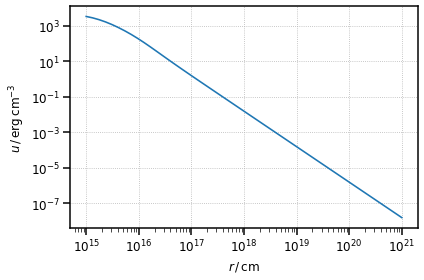

In [5]:
plt.loglog(r, u_disk)
plt.ylabel(u_label)
plt.xlabel(r_label)
plt.show()

Now let us simulate a point source behind the jet with the same luminosity as the disk. **In the limit of large
distances** (specifically when the distance $r$ becomes much larger than the emitter size, $r >> R_{\rm emitter}$), the energy density of any emitter should be approximable by the one of a point source. 

To test this hypothesis we create a point source (PS) approximating the disk emission. As the point source behind the jet (behind the blob, in fact) described by `agnpy` is monochromatic, we assume it has the same dimensionless energy as the photons emitted at the innermost disk radius.

In [6]:
ps = PointSourceBehindJet(L_disk, disk.epsilon(disk.R_in))
u_ps = ps.u(r)

/Users/cosimo/software/miniconda3/envs/gammapy-0.20.1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


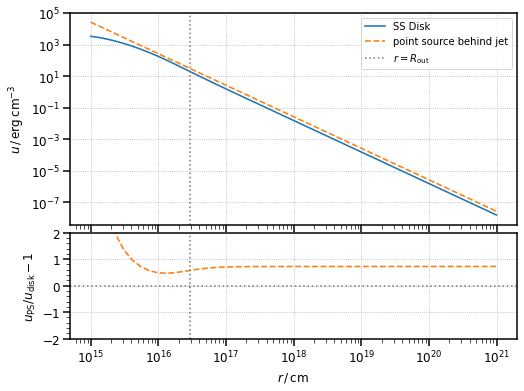

In [7]:
fig, ax = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": [2, 1], "hspace": 0.05},
    figsize=(8, 6),
)

ax[0].loglog(r, u_disk, label="SS Disk")
ax[0].loglog(r, u_ps, ls="--", label="point source behind jet")
ax[0].axvline(disk.R_out.to_value("cm"), ls=":", color="gray", label=r"$r=R_{\rm out}$")
ax[0].set_ylabel(u_label)
ax[0].legend()

deviation = u_ps / u_disk - 1

ax[1].axhline(0, ls=":", color="gray")
ax[1].semilogx(r, deviation, ls="--", color="tab:orange")
ax[1].axvline(disk.R_out.to_value("cm"), ls=":", color="gray")
ax[1].set_xlabel(r_label)
ax[1].set_ylabel(r"$u_{\rm PS} / u_{\rm disk} - 1$")
ax[1].set_ylim([-2, 2])

plt.show()

As we can see, for distances much larger than the disk external radius, the two densities tend to each other, though their ratio is never 1 (I will comment later on that). 

Let us see if the two energy densities are also compatible in the reference frame comoving with the blob.
To compute the energy density in such a frame we just have to pass a `Blob` instance to the `u` method.

In [8]:
blob = Blob()

u_prime_disk = disk.u(r, blob)
u_prime_ps = ps.u(r, blob)

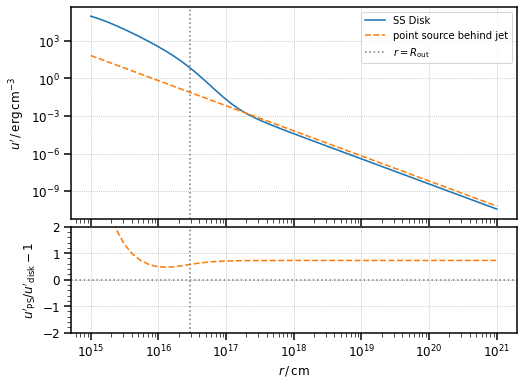

In [9]:
fig, ax = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": [2, 1], "hspace": 0.05},
    figsize=(8, 6),
)

ax[0].loglog(r, u_prime_disk, label="SS Disk")
ax[0].loglog(r, u_prime_ps, ls="--", label="point source behind jet")
ax[0].axvline(disk.R_out.to_value("cm"), ls=":", color="gray", label=r"$r=R_{\rm out}$")
ax[0].set_ylabel(u_prime_label)
ax[0].legend()

deviation = u_ps / u_disk - 1

ax[1].axhline(0, ls=":", color="gray")
ax[1].semilogx(r, deviation, ls="--", color="tab:orange")
ax[1].axvline(disk.R_out.to_value("cm"), ls=":", color="gray")
ax[1].set_xlabel(r_label)
ax[1].set_ylabel(r"$u'_{\rm PS} / u'_{\rm disk} - 1$")
ax[1].set_ylim([-2, 2])

plt.show()

As we can see, for $r >> R_{\rm out}$, the two distances tend to each other.

I think that the fact that the ratio between the energy densities does not converge to 1 is due to the expression for the energy density of the disk not being properly normalised with respect to the radius variable $R$. One in fact can see how, given the same luminosity, changing the external and internal radii of the disk will alter the value of $u$ at large distances. This should not be the case as, no matter how the luminosity is geometrically distributed, it should always reduce to the case of a point source at very large distances.

## Spherical Shell Broad Line Region
Let us compute the energy density of a broad line region (BLR) in the two reference frame (stationary in the galaxy and comoving with the blob) and compare it with a monochromatic point source approximating the BLR.

In [10]:
blr = SphericalShellBLR(L_disk, 0.1, "Lyalpha", 1e17 * u.cm)

# point source with the same luminosity as the BLR and line emission as the BLR
ps = PointSourceBehindJet(blr.xi_line * L_disk, blr.epsilon_line)

# compute the energy densities in the stationary frame
u_blr = blr.u(r)
u_ps = ps.u(r)

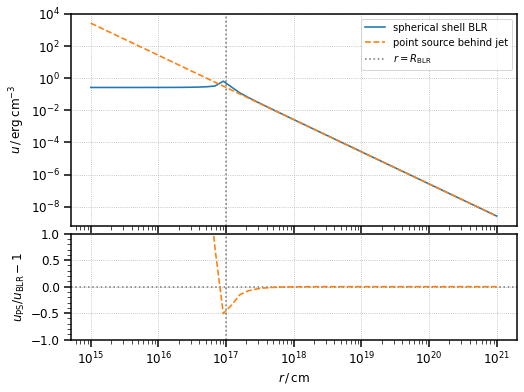

In [11]:
fig, ax = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": [2, 1], "hspace": 0.05},
    figsize=(8, 6),
)

ax[0].loglog(r, u_blr, label="spherical shell BLR")
ax[0].loglog(r, u_ps, ls="--", label="point source behind jet")
ax[0].axvline(blr.R_line.to_value("cm"), ls=":", color="gray", label=r"$r=R_{\rm BLR}$")
ax[0].set_ylabel(u_label)
ax[0].legend()

deviation = u_ps / u_blr - 1

ax[1].axhline(0, ls=":", color="gray")
ax[1].semilogx(r, deviation, ls="--", color="tab:orange")
ax[1].axvline(blr.R_line.to_value("cm"), ls=":", color="gray")
ax[1].set_xlabel(r_label)
ax[1].set_ylabel(r"$u_{\rm PS} / u_{\rm BLR} - 1$")
ax[1].set_ylim([-1, 1])

plt.show()

In [12]:
# compute the energy densities in the frame comoving with the blob
u_prime_blr = blr.u(r, blob)
u_prime_ps = ps.u(r, blob)

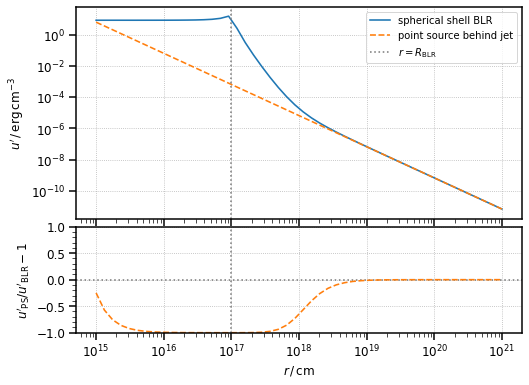

In [13]:
fig, ax = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": [2, 1], "hspace": 0.05},
    figsize=(8, 6),
)

ax[0].loglog(r, u_prime_blr, label="spherical shell BLR")
ax[0].loglog(r, u_prime_ps, ls="--", label="point source behind jet")
ax[0].axvline(blr.R_line.to_value("cm"), ls=":", color="gray", label=r"$r=R_{\rm BLR}$")
ax[0].set_ylabel(u_prime_label)
ax[0].legend()

deviation = u_prime_ps / u_prime_blr - 1

ax[1].axhline(0, ls=":", color="gray")
ax[1].semilogx(r, deviation, ls="--", color="tab:orange")
ax[1].axvline(blr.R_line.to_value("cm"), ls=":", color="gray")
ax[1].set_xlabel(r_label)
ax[1].set_ylabel(r"$u'_{\rm PS} / u'_{\rm BLR} - 1$")
ax[1].set_ylim([-1, 1])

plt.show()

As we can see, in both reference frames, the energy density of the BLR tends to the one of a point source behind the jet for large enough distances ($r >> R_{\rm BLR}$ in this case).

## Ring Dust Torus
Finally let us repeat the same exercise for the torus.

In [14]:
dt = RingDustTorus(L_disk, 0.2, 1000 * u.K)

# point source approximating the torus
ps = PointSourceBehindJet(dt.xi_dt * L_disk, dt.epsilon_dt)

u_dt = dt.u(r)
u_ps = ps.u(r)

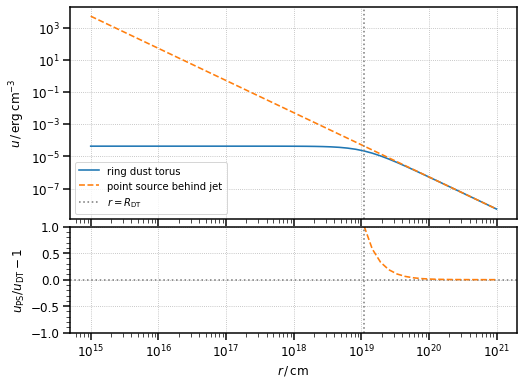

In [15]:
fig, ax = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": [2, 1], "hspace": 0.05},
    figsize=(8, 6),
)

ax[0].loglog(r, u_dt, label="ring dust torus")
ax[0].loglog(r, u_ps, ls="--", label="point source behind jet")
ax[0].axvline(dt.R_dt.to_value("cm"), ls=":", color="gray", label=r"$r=R_{\rm DT}$")
ax[0].set_ylabel(u_label)
ax[0].legend()

deviation = u_ps / u_dt - 1

ax[1].axhline(0, ls=":", color="gray")
ax[1].semilogx(r, deviation, ls="--", color="tab:orange")
ax[1].axvline(dt.R_dt.to_value("cm"), ls=":", color="gray")
ax[1].set_xlabel(r_label)
ax[1].set_ylabel(r"$u_{\rm PS} / u_{\rm DT} - 1$")
ax[1].set_ylim([-1, 1])

plt.show()

In [16]:
# compute the energy density in the comoving frame
u_prime_dt = dt.u(r, blob)
u_prime_ps = ps.u(r, blob)

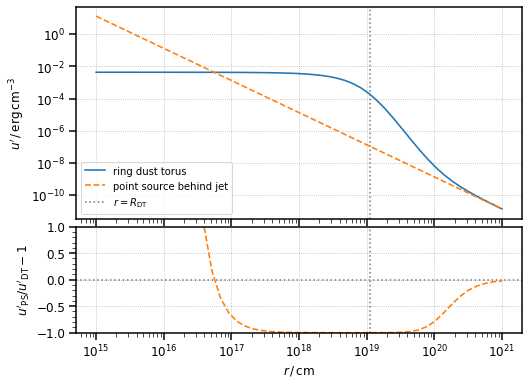

In [17]:
fig, ax = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": [2, 1], "hspace": 0.05},
    figsize=(8, 6),
)

ax[0].loglog(r, u_prime_dt, label="ring dust torus")
ax[0].loglog(r, u_prime_ps, ls="--", label="point source behind jet")
ax[0].axvline(dt.R_dt.to_value("cm"), ls=":", color="gray", label=r"$r=R_{\rm DT}$")
ax[0].set_ylabel(u_prime_label)
ax[0].legend()

deviation = u_prime_ps / u_prime_dt - 1

ax[1].axhline(0, ls=":", color="gray")
ax[1].semilogx(r, deviation, ls="--", color="tab:orange")
ax[1].axvline(dt.R_dt.to_value("cm"), ls=":", color="gray")
ax[1].set_xlabel(r_label)
ax[1].set_ylabel(r"$u'_{\rm PS} / u'_{\rm DT} - 1$")
ax[1].set_ylim([-1, 1])

plt.show()

Again, in both reference frames and for large distances - larger than the source size, the energy density of the dust torus tends to the one of a point source behind the jet with the same luminosity.